In [201]:
#library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score, make_scorer

In [202]:
df = pd.read_csv("hotel_bookings_processed.csv")

# Exploratory Data Analytics (EDA) 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53424 entries, 0 to 53423
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     53424 non-null  int64  
 1   lead_time                       53424 non-null  int64  
 2   arrival_date_week_number        53424 non-null  int64  
 3   meal                            53424 non-null  object 
 4   market_segment                  53424 non-null  object 
 5   distribution_channel            53424 non-null  object 
 6   is_repeated_guest               53424 non-null  int64  
 7   previous_cancellations          53424 non-null  int64  
 8   previous_bookings_not_canceled  53424 non-null  int64  
 9   reserved_room_type              53424 non-null  object 
 10  assigned_room_type              53424 non-null  object 
 11  booking_changes                 53424 non-null  int64  
 12  deposit_type                    

In [204]:
df.columns.tolist()

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_members',
 'total_stay',
 'continent',
 'assignment']

In [205]:
# 22 var
all_variables = ['is_canceled',
                 'lead_time',
                 'arrival_date_week_number',
                 'meal',
                 'market_segment',
                 'distribution_channel',
                 'is_repeated_guest',
                 'previous_cancellations',
                 'previous_bookings_not_canceled',
                 'reserved_room_type',
                 'assigned_room_type',
                 'booking_changes',
                 'deposit_type',
                 'days_in_waiting_list',
                 'customer_type',
                 'adr',
                 'required_car_parking_spaces',
                 'total_of_special_requests',
                 'total_members',
                 'total_stay',
                 'continent',
                 'assignment']

In [206]:
# 3 var
continuous_variables = ['days_in_waiting_list', 'adr', 'lead_time']

In [207]:
# 8 var
discrete_variables = ['previous_cancellations', 'previous_bookings_not_canceled',
                     'booking_changes', 'required_car_parking_spaces',
                      'total_of_special_requests', 'total_members', 'total_stay', 'arrival_date_week_number']

In [208]:
# 11 var
continuous_and_discrete_variables = continuous_variables + discrete_variables

In [209]:
# 10 var + is_canceled
categorical_variables = ['is_canceled', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                          'customer_type', 'continent', 'assignment']

## Univariate Analysis

### Histogram for Continuous and Discrete Variables

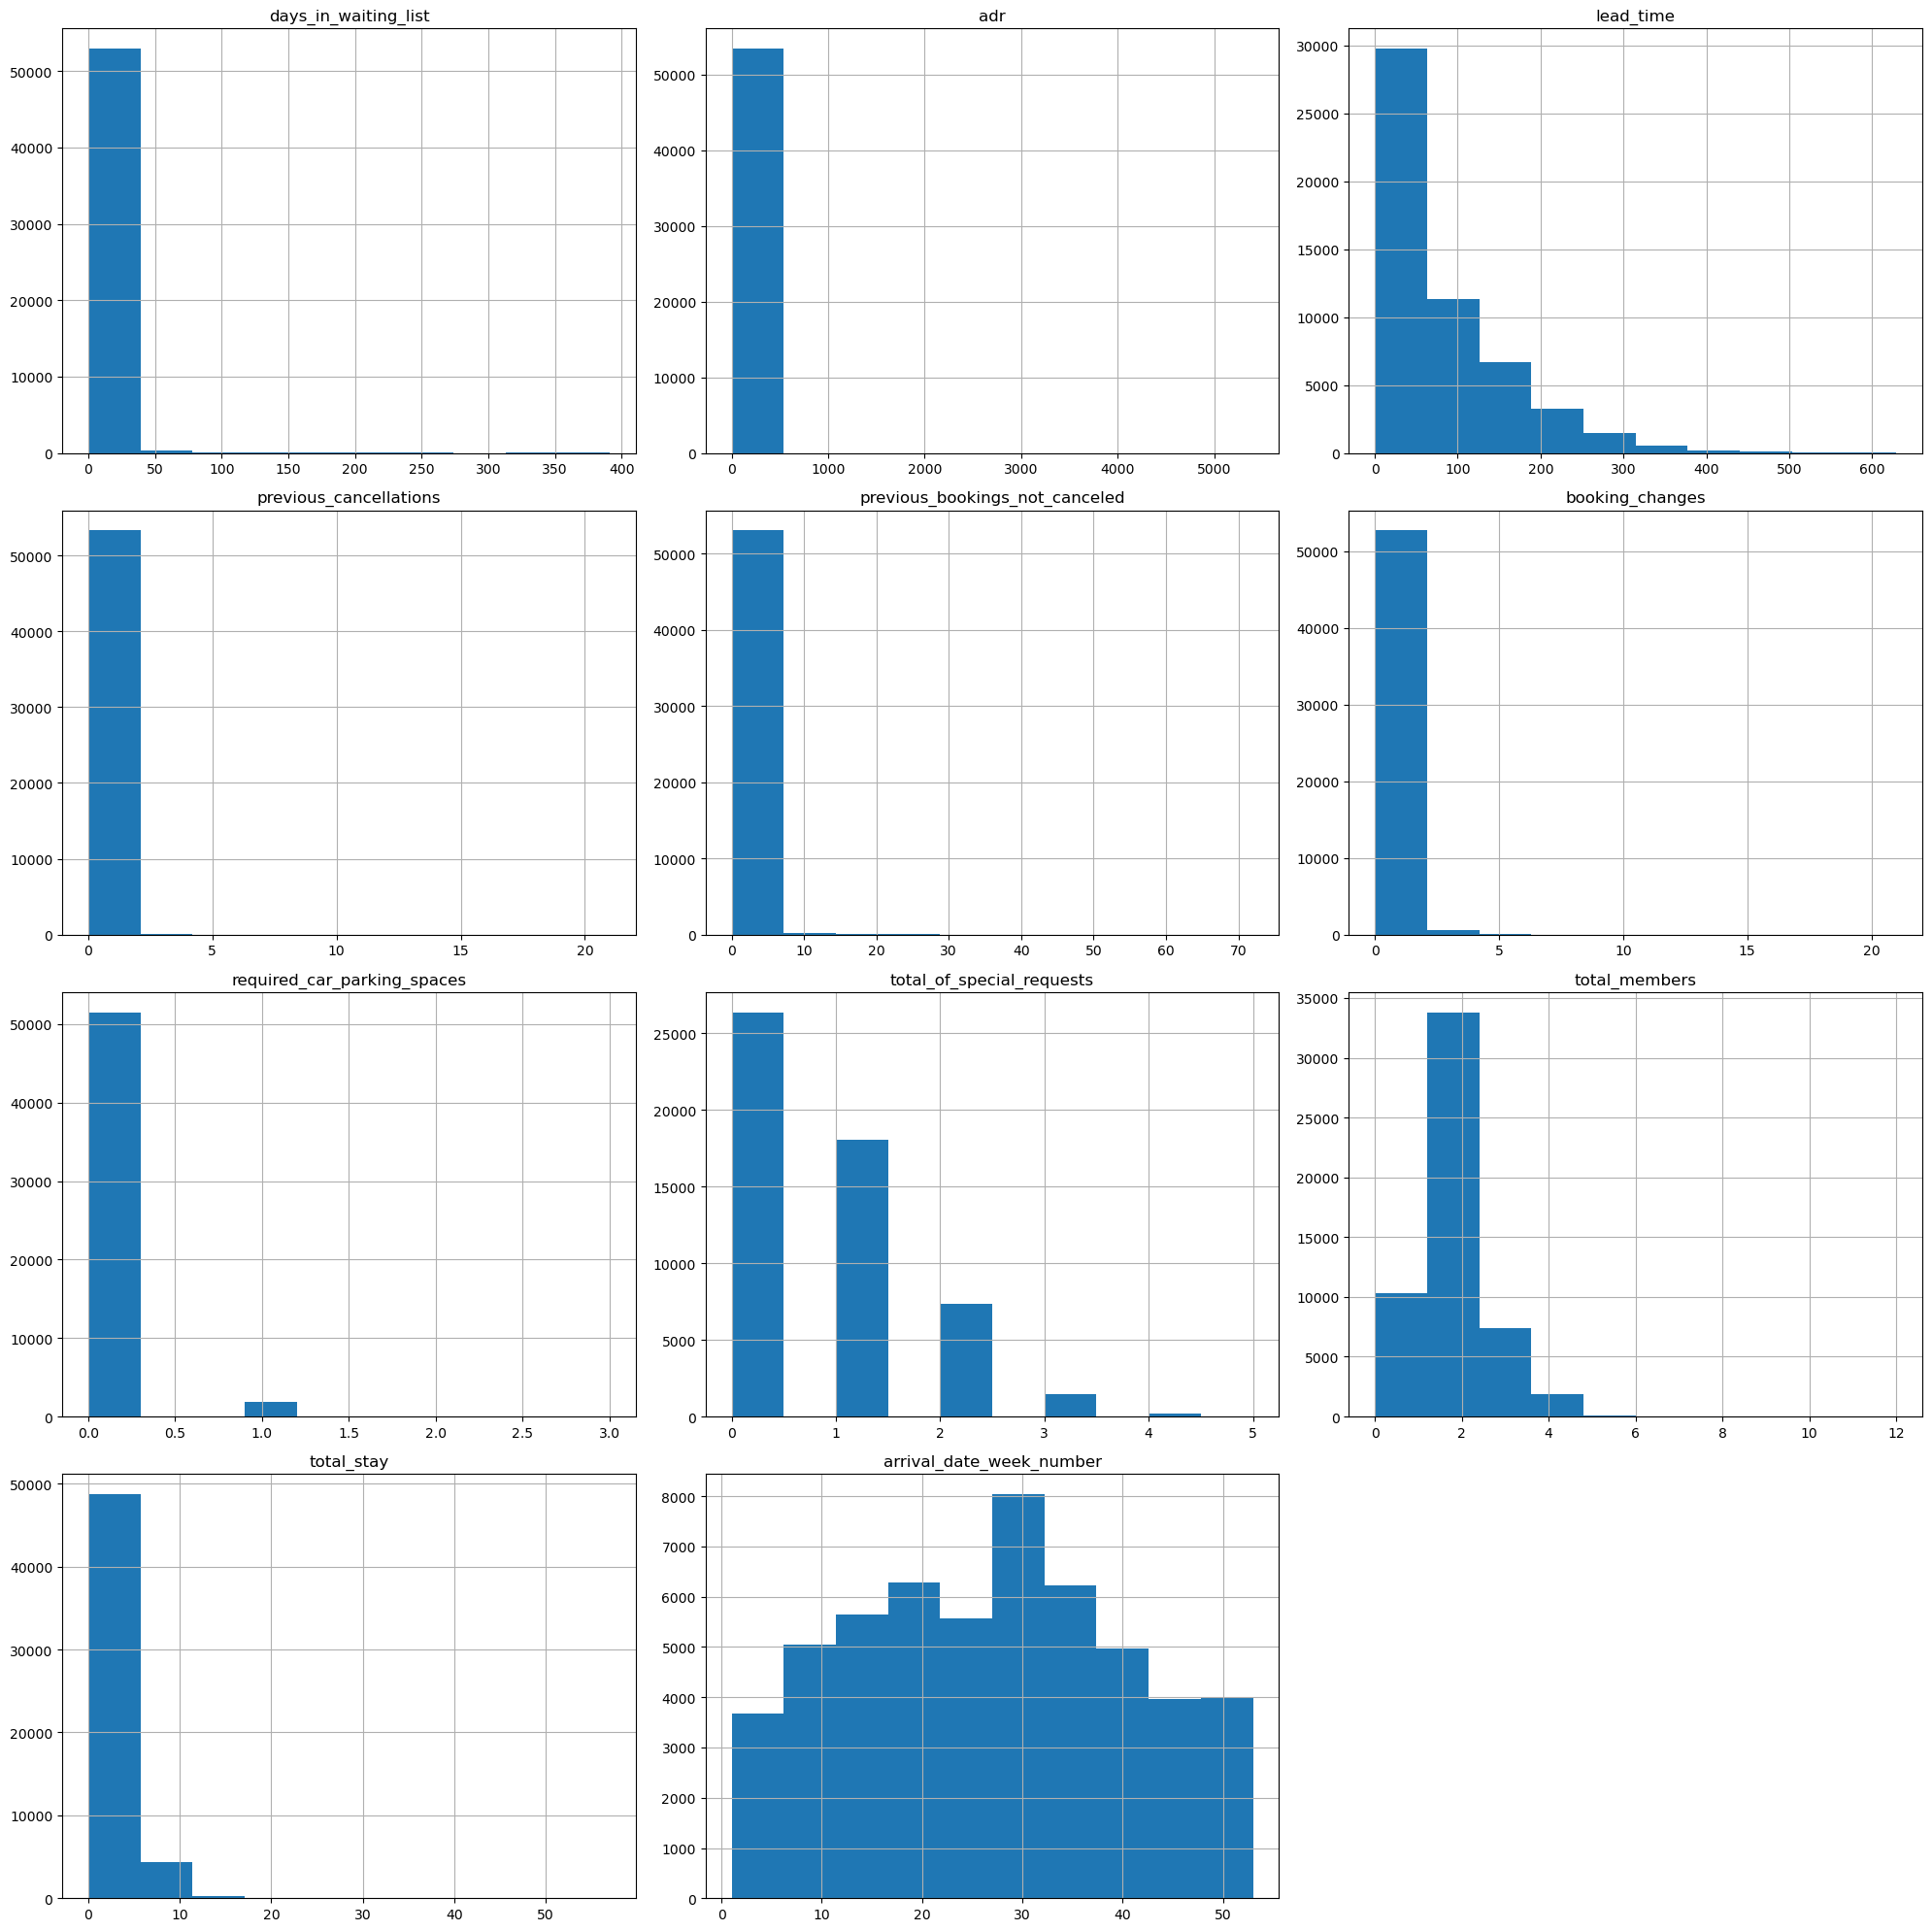

In [210]:
df[continuous_and_discrete_variables].hist(figsize=(20,20))
plt.tight_layout()

### Bar Charts for Categorical Variables

In [211]:
def barchart(catvar):
    sns.countplot(x = df[catvar])
    normalise_count = df[catvar].value_counts(normalize = True)

    # we are using the output of value_counts() normalised as the chart title
    ax = plt.title(str(catvar) + ' percent \n {};'.format(normalise_count))
    plt.xticks(fontsize=8)
#     plt.xticks(fontsize=14, rotation=90)
    
    for p in sns.countplot(x = df[catvar]).patches:
        sns.countplot(x = df[catvar]).text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
                fontsize=10, color='black', ha='center', va='bottom')
    return ax

Text(0.5, 1.0, 'is_canceled percent \n 0    0.699667\n1    0.300333\nName: is_canceled, dtype: float64;')

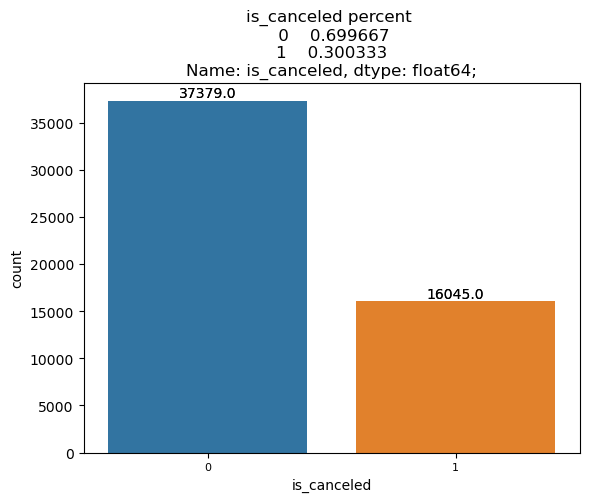

In [212]:
barchart('is_canceled')

Text(0.5, 1.0, 'meal percent \n BB    0.771657\nSC    0.175895\nHB    0.052242\nFB    0.000206\nName: meal, dtype: float64;')

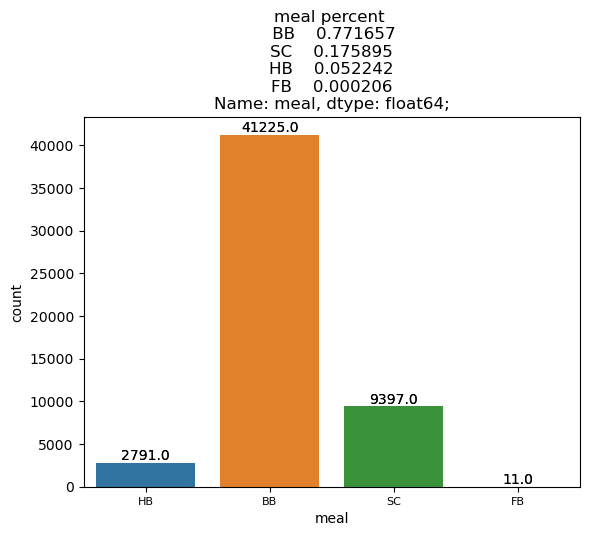

In [213]:
barchart('meal')

Text(0.5, 1.0, 'market_segment percent \n Online TA        0.655005\nOffline TA/TO    0.136100\nDirect           0.104036\nGroups           0.049322\nCorporate        0.041685\nComplementary    0.009602\nAviation         0.004249\nName: market_segment, dtype: float64;')

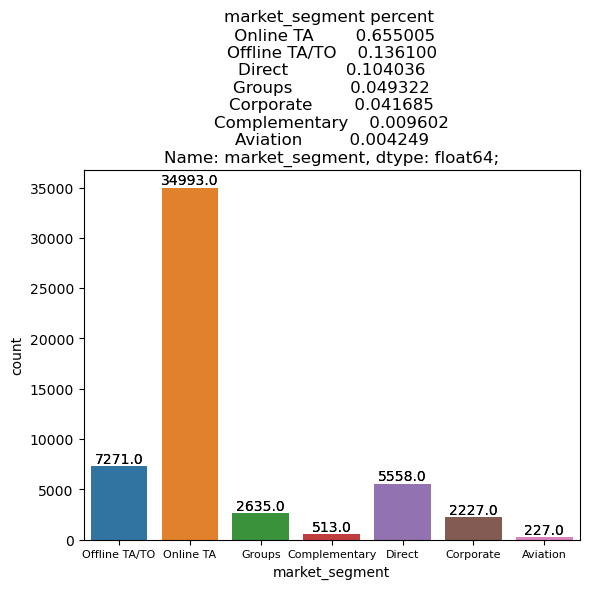

In [214]:
barchart('market_segment')

Text(0.5, 1.0, 'distribution_channel percent \n TA/TO        0.833876\nDirect       0.113938\nCorporate    0.048798\nGDS          0.003388\nName: distribution_channel, dtype: float64;')

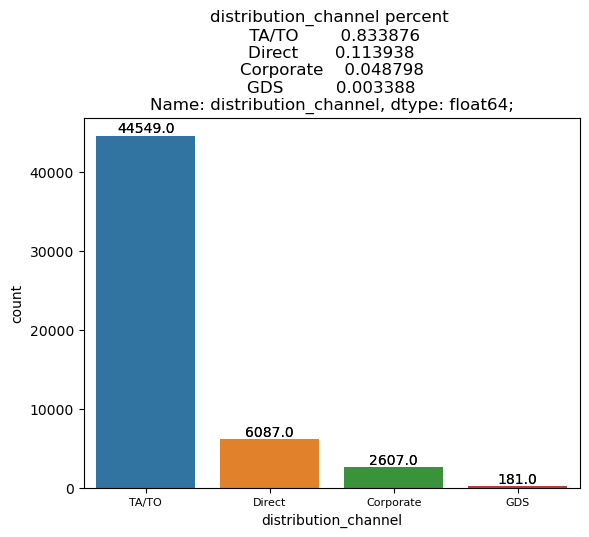

In [215]:
barchart('distribution_channel')

Text(0.5, 1.0, 'is_repeated_guest percent \n 0    0.968029\n1    0.031971\nName: is_repeated_guest, dtype: float64;')

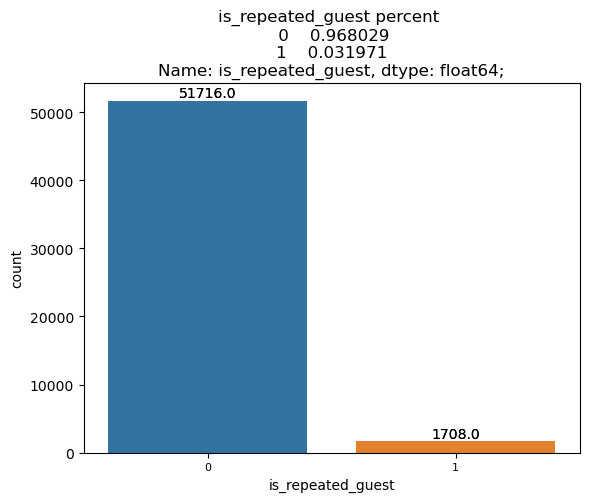

In [216]:
barchart('is_repeated_guest')

Text(0.5, 1.0, 'reserved_room_type percent \n A    0.710205\nD    0.201520\nF    0.032888\nE    0.027516\nB    0.018568\nG    0.008966\nC    0.000262\nP    0.000075\nName: reserved_room_type, dtype: float64;')

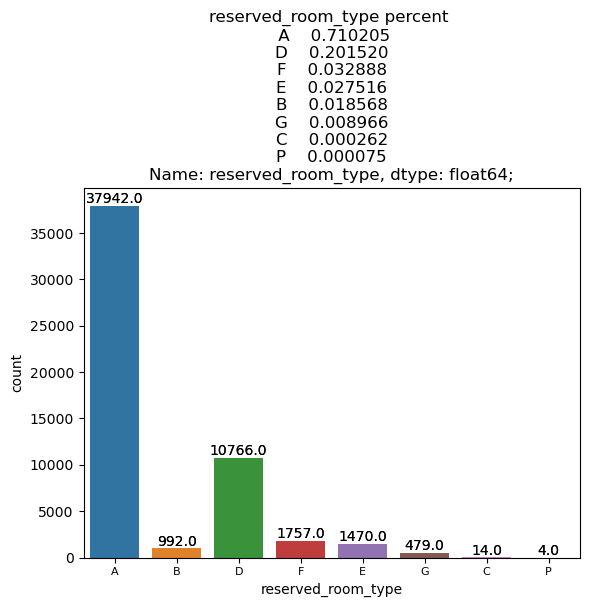

In [217]:
barchart('reserved_room_type')

Text(0.5, 1.0, 'assigned_room_type percent \n A    0.625281\nD    0.247248\nE    0.038391\nF    0.036875\nB    0.031016\nG    0.012934\nK    0.005166\nC    0.003014\nP    0.000075\nName: assigned_room_type, dtype: float64;')

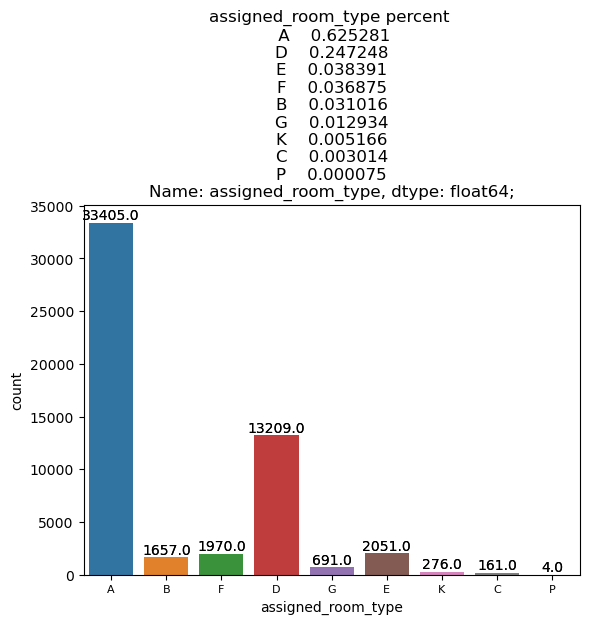

In [218]:
barchart('assigned_room_type')

Text(0.5, 1.0, 'deposit_type percent \n No Deposit    0.983902\nNon Refund    0.015817\nRefundable    0.000281\nName: deposit_type, dtype: float64;')

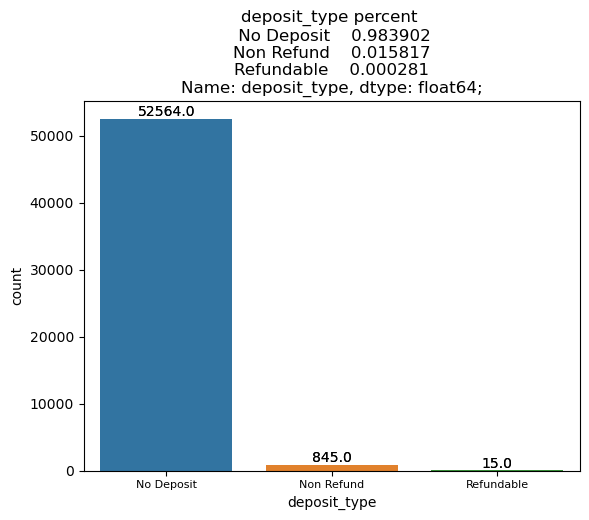

In [219]:
barchart('deposit_type')

Text(0.5, 1.0, 'customer_type percent \n Transient          0.835598\nTransient-Party    0.131795\nContract           0.027534\nGroup              0.005073\nName: customer_type, dtype: float64;')

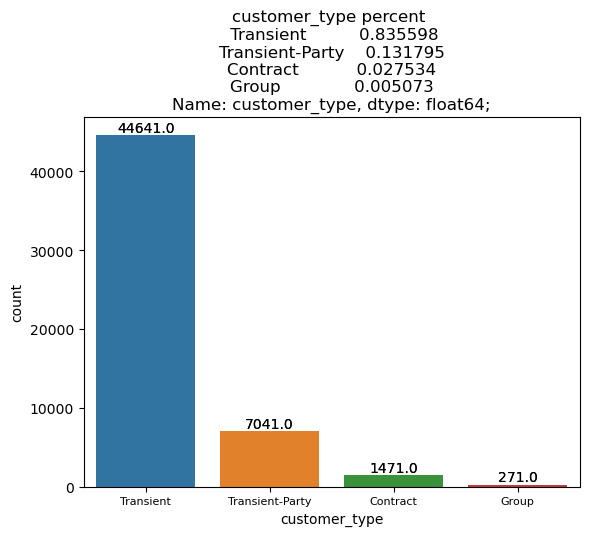

In [220]:
barchart('customer_type')

Text(0.5, 1.0, 'continent percent \n Europe           0.864499\nAsia             0.047451\nSouth America    0.036220\nNorth America    0.028564\nAfrica           0.015555\nAustralia        0.005466\nOthers           0.002134\nUnknown          0.000112\nName: continent, dtype: float64;')

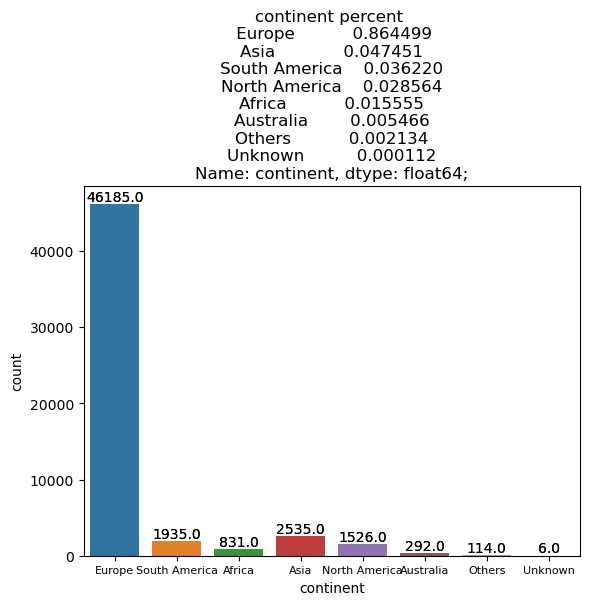

In [221]:
barchart('continent')

Text(0.5, 1.0, 'assignment percent \n 1    0.885969\n0    0.114031\nName: assignment, dtype: float64;')

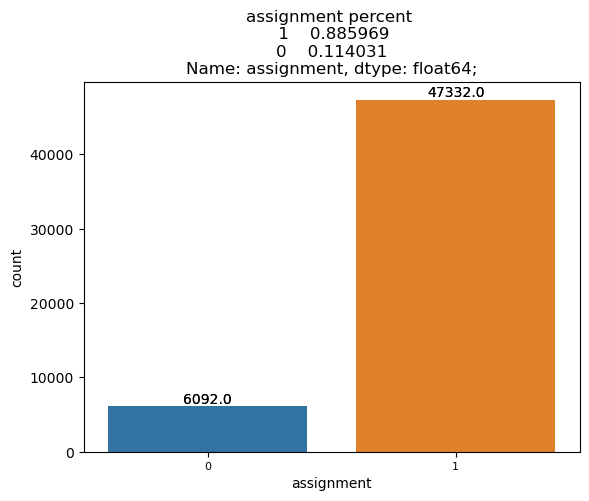

In [222]:
barchart('assignment')

## Bivariate Analysis

### Analyse continuous variables using KDE plots

In [223]:
def KDE_plot(x, desc):
    plt.figure(figsize=(9,5))
    sns.kdeplot(data=df, x=x, hue="is_canceled", fill = True)
    plt.title("Distribution of " + str(desc) + " by Cancellation")

In [224]:
continuous_variables

['days_in_waiting_list', 'adr', 'lead_time']

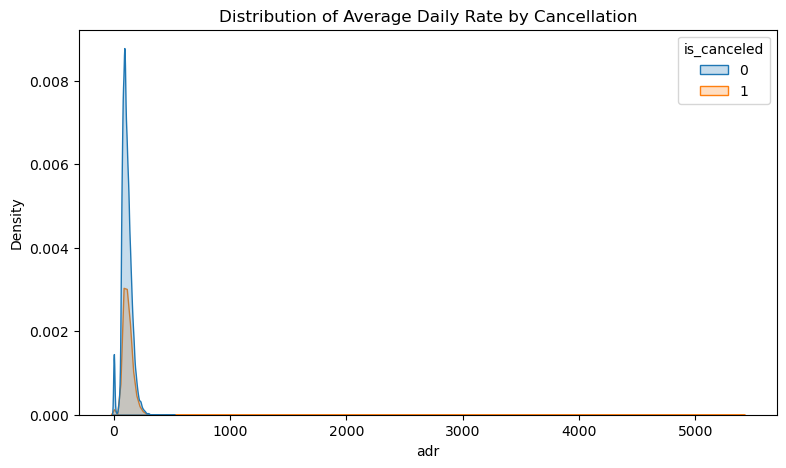

In [225]:
KDE_plot('adr', 'Average Daily Rate')

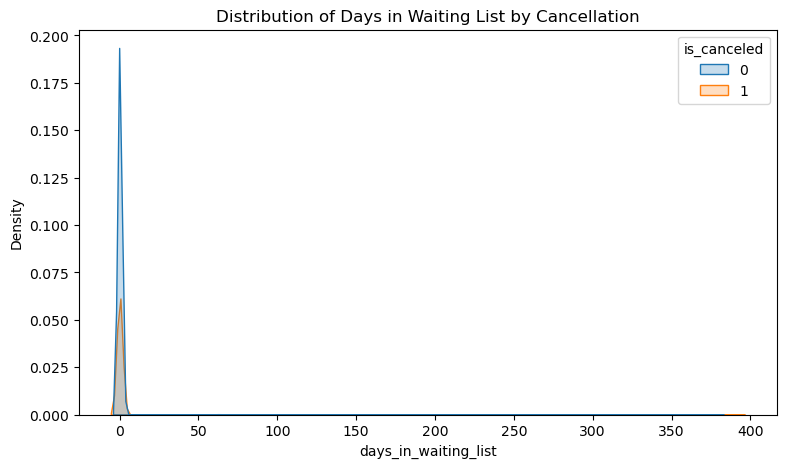

In [226]:
KDE_plot('days_in_waiting_list', 'Days in Waiting List')

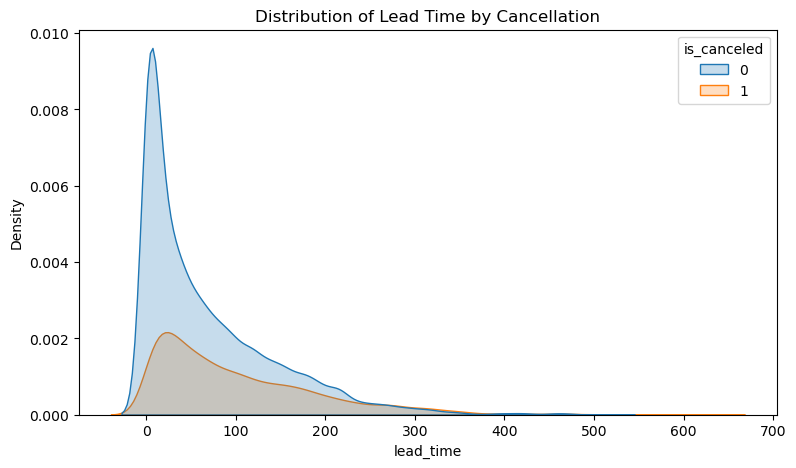

In [227]:
KDE_plot('lead_time', 'Lead Time')

<AxesSubplot: xlabel='lead_time', ylabel='Density'>

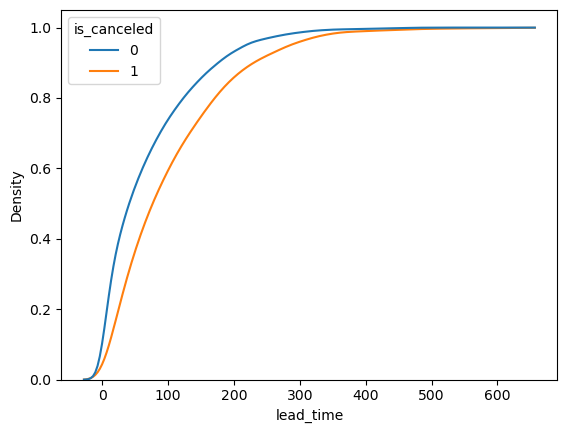

In [296]:
sns.kdeplot(
    data=df, x="lead_time", hue="is_canceled",
    cumulative=True, common_norm=False, common_grid=True,
)

### Analyse categorical variables using bar charts

In [228]:
def multi_bar(var, reason):
    plt.figure(figsize=(9,6))
    ax = sns.countplot(x= df[var], hue=df['is_canceled'])
    plt.title('Cancellations by the ' + str(reason))
#     plt.xticks(rotation=90)
    plt.xticks(fontsize=8)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
                fontsize=8, color='black', ha='center', va='bottom')

In [229]:
def stacked_bar(var):
    df_JobBivariate = df.groupby(var)['is_canceled'].value_counts(normalize = True).unstack()
    ax = df_JobBivariate.plot(kind='bar', stacked='True', title = str(df_JobBivariate.round(3)))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.xticks(fontsize=8, rotation=0)

In [230]:
categorical_variables

['is_canceled',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'continent',
 'assignment']

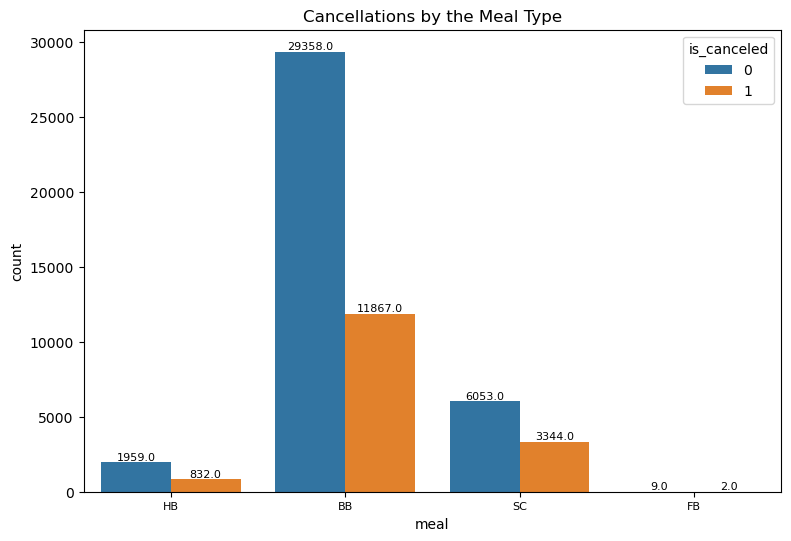

In [231]:
multi_bar("meal", "Meal Type")

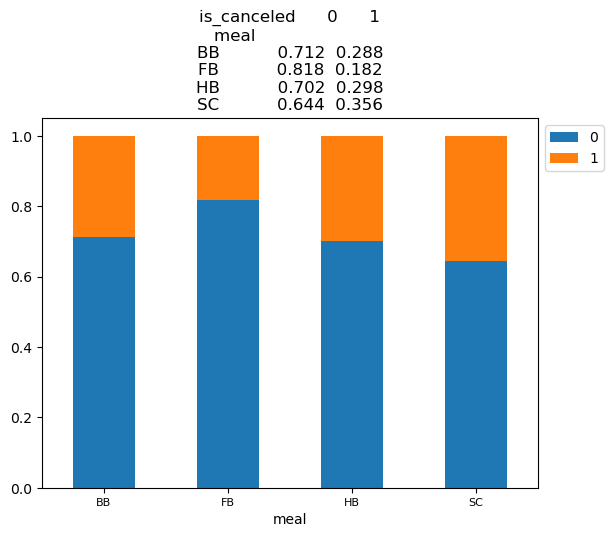

In [232]:
stacked_bar("meal")

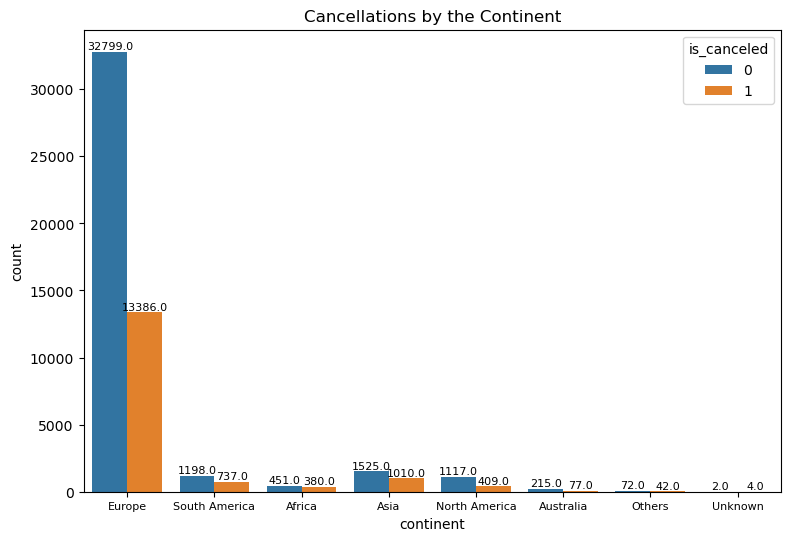

In [233]:
multi_bar("continent", "Continent")

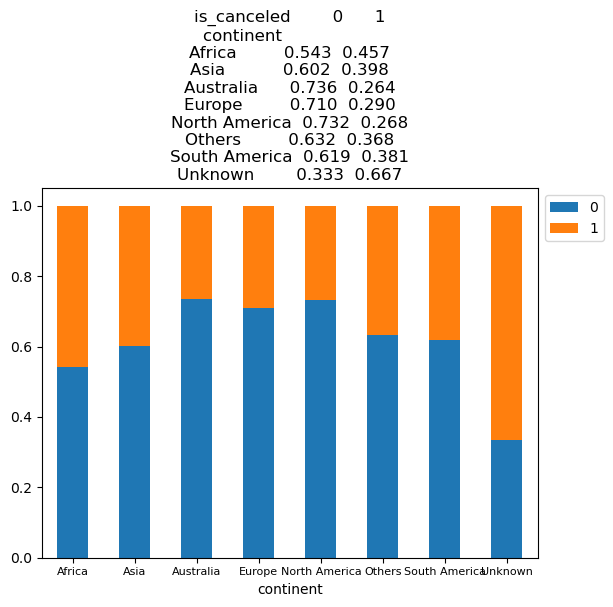

In [234]:
stacked_bar("continent")

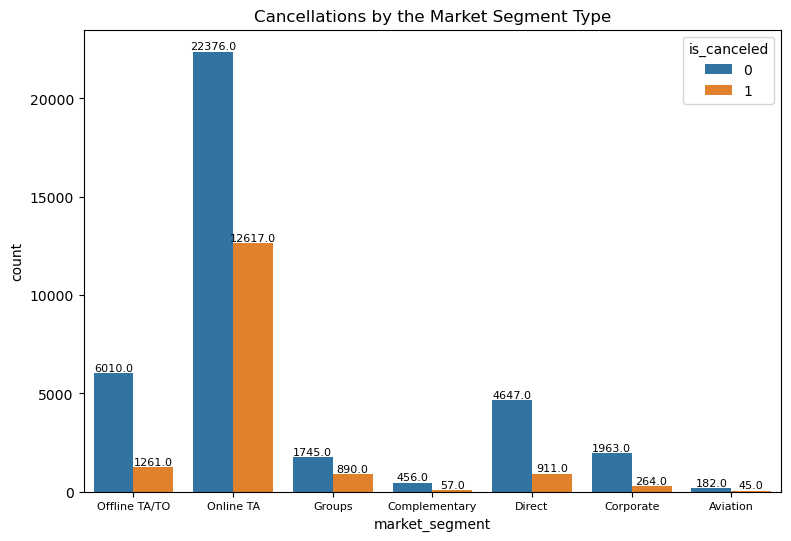

In [235]:
multi_bar("market_segment", "Market Segment Type")

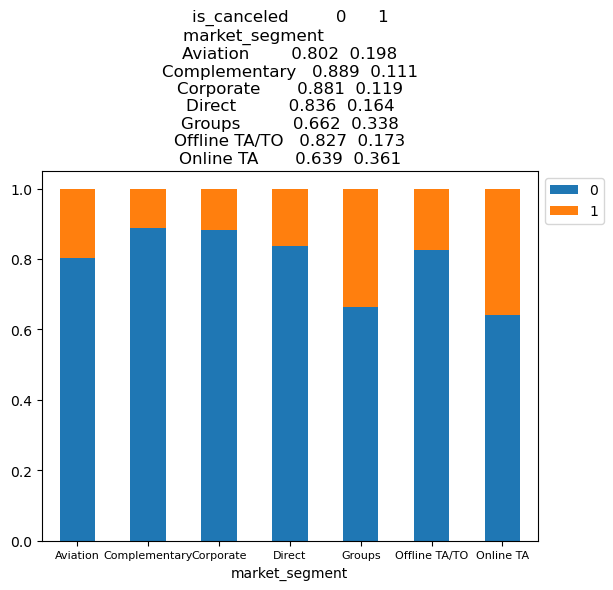

In [236]:
stacked_bar("market_segment")

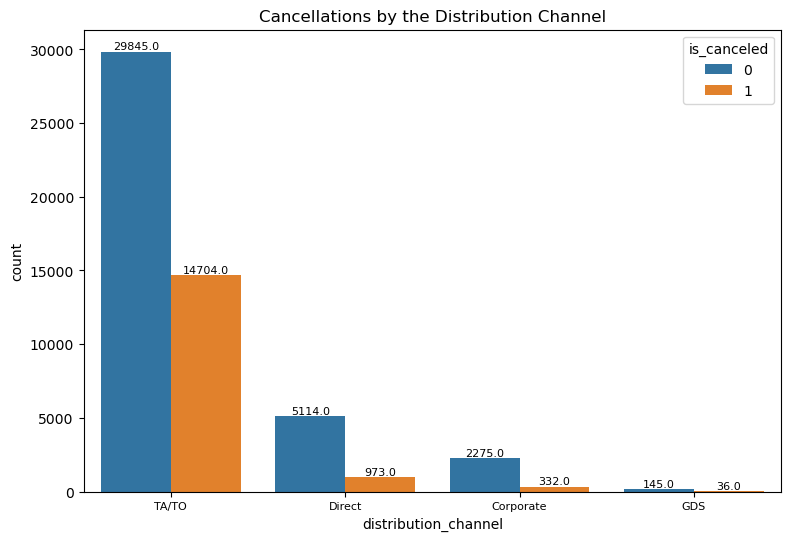

In [237]:
multi_bar("distribution_channel", "Distribution Channel")

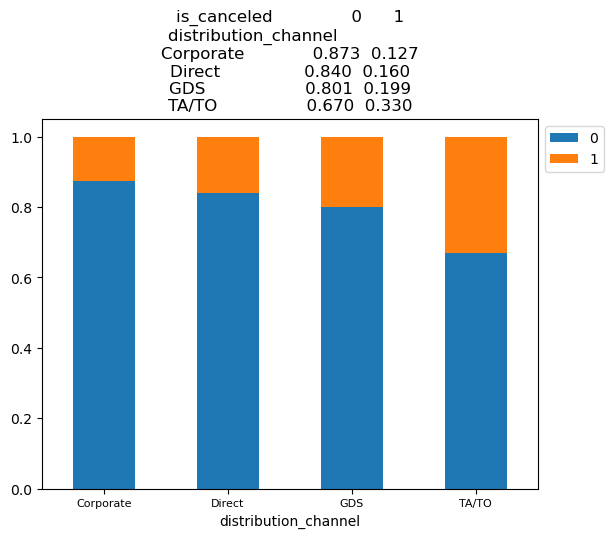

In [238]:
stacked_bar("distribution_channel")

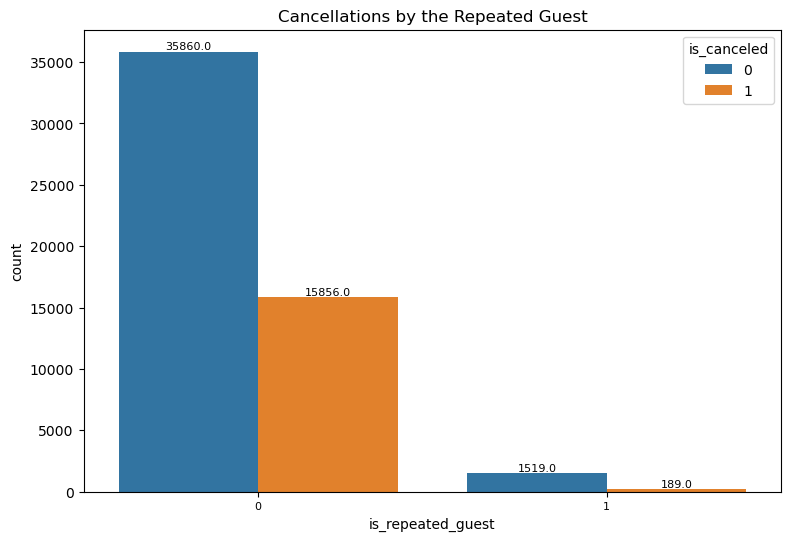

In [239]:
multi_bar("is_repeated_guest", "Repeated Guest")

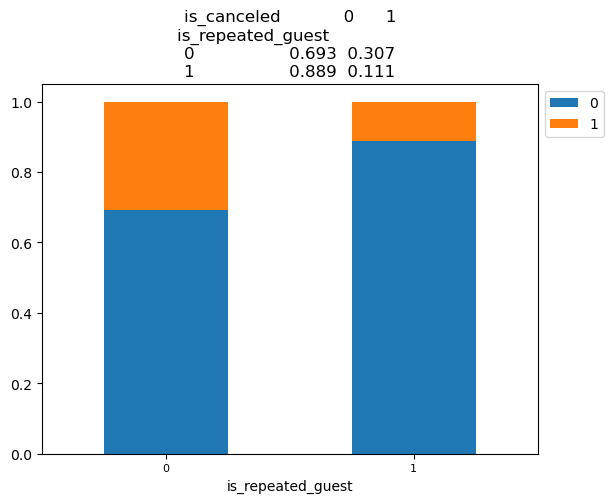

In [240]:
stacked_bar("is_repeated_guest")

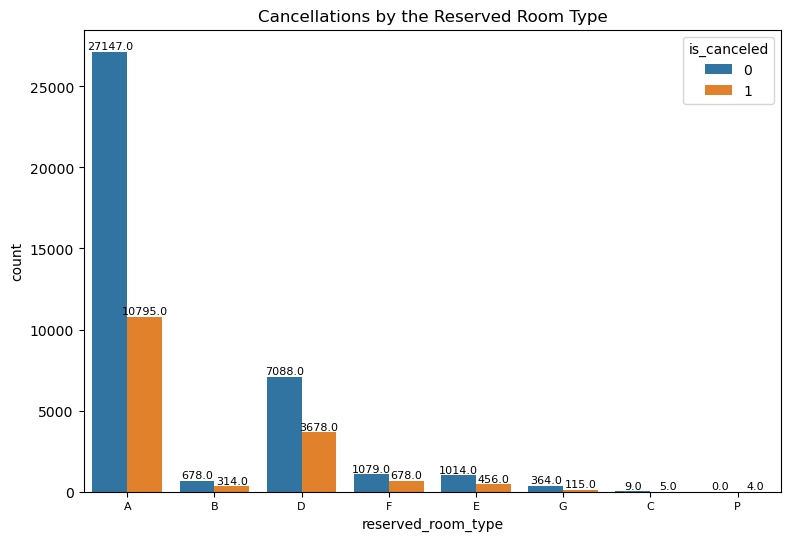

In [241]:
multi_bar("reserved_room_type", "Reserved Room Type")

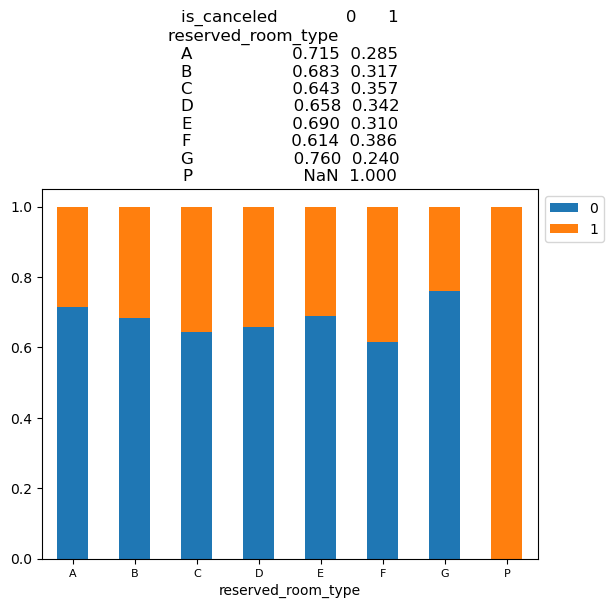

In [242]:
stacked_bar("reserved_room_type")

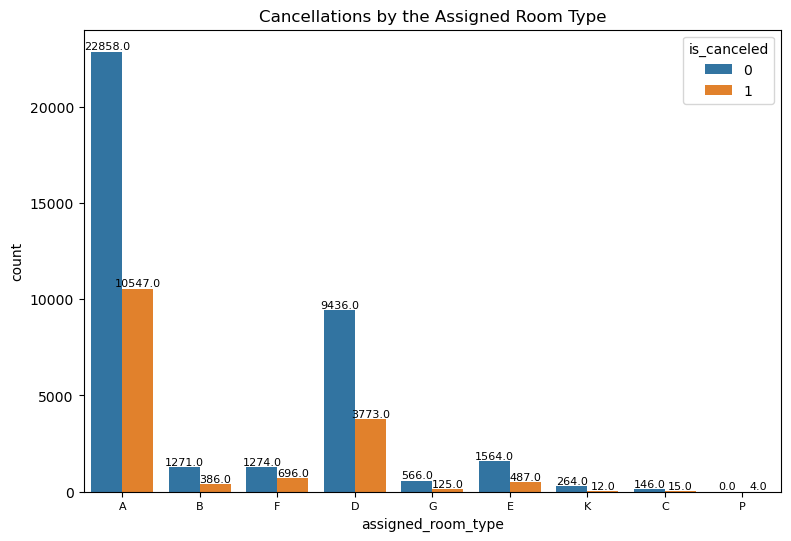

In [243]:
multi_bar("assigned_room_type", "Assigned Room Type")

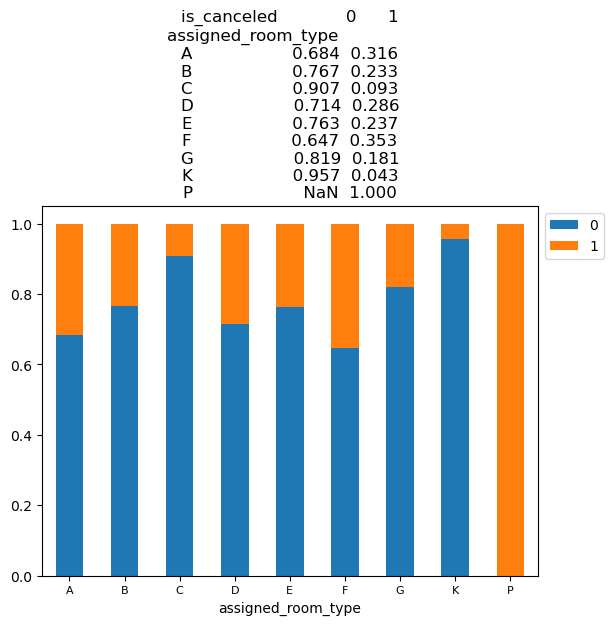

In [244]:
stacked_bar("assigned_room_type")

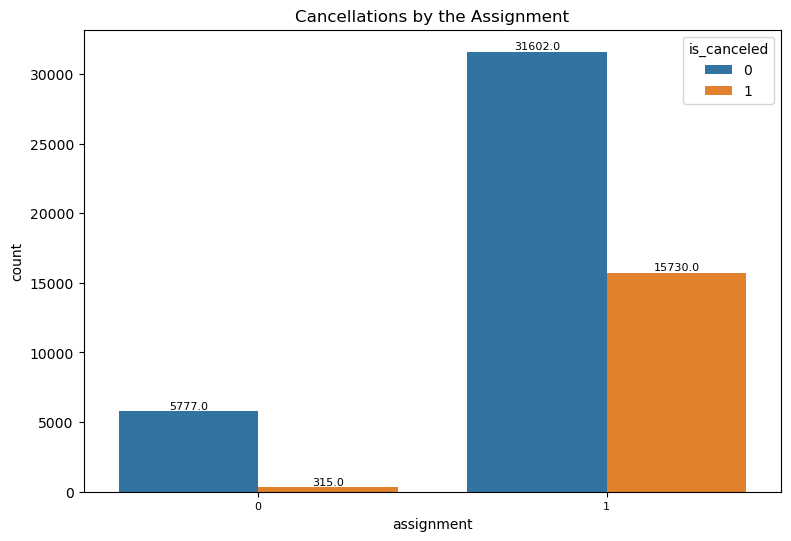

In [245]:
multi_bar("assignment", "Assignment")

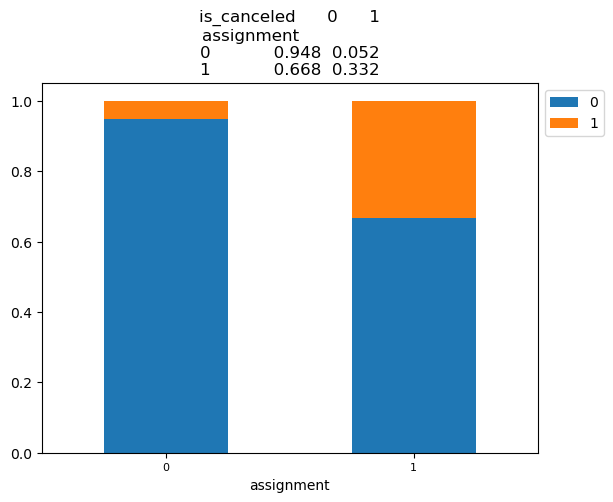

In [246]:
stacked_bar("assignment")

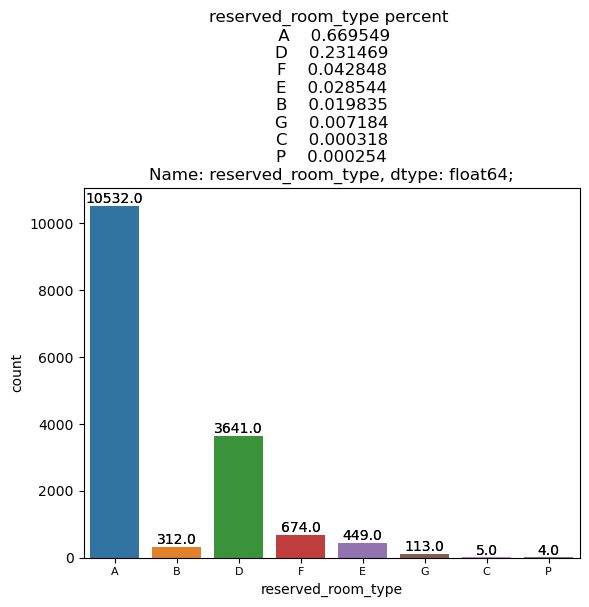

In [247]:
# among those who got assigned the room they reserved (assignment = 1), 33% cancelled
# among those who are assigned their reserved room AND cancelled, what room did they reserve and not want?
# maybe they got what they want but cancelled bc they dont like this particular room type?

assigned1_cancelled1 = df[(df['assignment']==1) & (df['is_canceled']==1)]

sns.countplot(x = assigned1_cancelled1['reserved_room_type'])
normalise_count = assigned1_cancelled1['reserved_room_type'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title(str('reserved_room_type') + ' percent \n {};'.format(normalise_count))
plt.xticks(fontsize=8)

for p in sns.countplot(x = assigned1_cancelled1['reserved_room_type']).patches:
    sns.countplot(x = assigned1_cancelled1['reserved_room_type']).text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=10, color='black', ha='center', va='bottom')

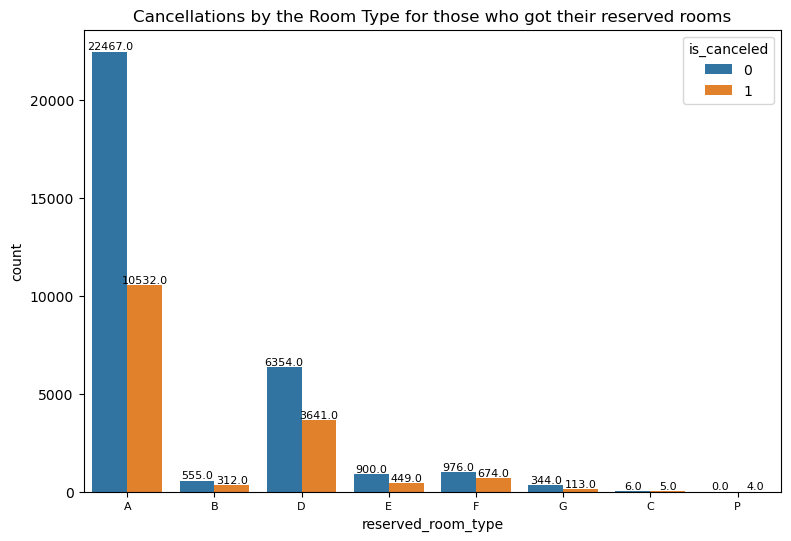

In [297]:
# among those who are assigned the room they reserved, how many cancelled

plt.figure(figsize=(9,6))
ax = sns.countplot(x= df[df['assignment']==1]['reserved_room_type'], hue=df['is_canceled'])
plt.title('Cancellations by the Room Type for those who got their reserved rooms')
plt.xticks(fontsize=8)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=8, color='black', ha='center', va='bottom')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'P')])

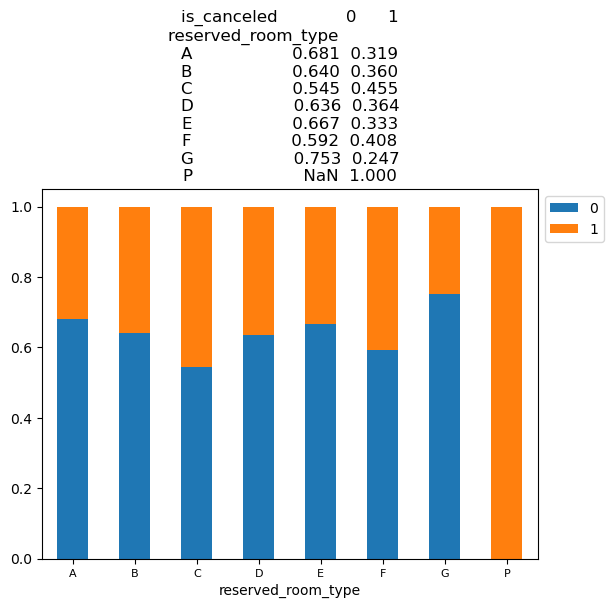

In [298]:
# among those who are assigned the room they reserved, how many % cancelled for each reserved room type
# room type F has the highest % of cancellations (excluding C and P since num of bookings are few)

df_JobBivariate = df[df['assignment']==1].groupby('reserved_room_type')['is_canceled'].value_counts(normalize = True).unstack()
ax = df_JobBivariate.plot(kind='bar', stacked='True', title = str(df_JobBivariate.round(3)))
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(fontsize=8, rotation=0)

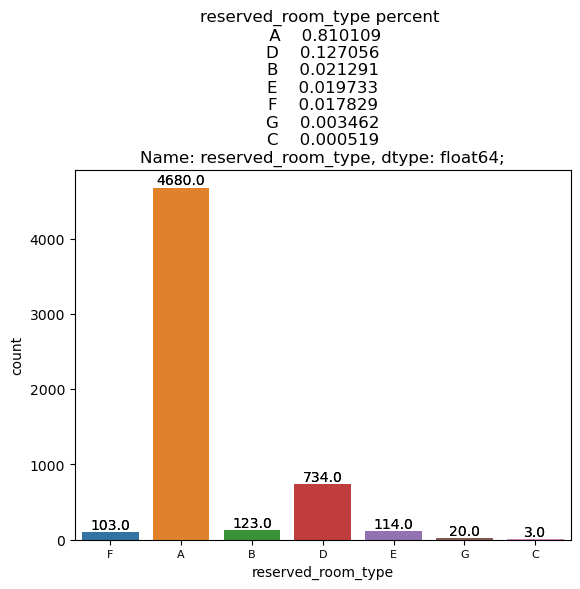

In [248]:
# among those who are not assigned their reserved room (assignment = 0), 95% did not cancel
# among those who are not assigned their reserved room AND did not cancel, what room did they reserve?

# most people actually reserved room type A but was not assigned to it

assigned0_cancelled0 = df[(df['assignment']==0) & (df['is_canceled']==0)]

sns.countplot(x = assigned0_cancelled0['reserved_room_type'])
normalise_count = assigned0_cancelled0['reserved_room_type'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title(str('reserved_room_type') + ' percent \n {};'.format(normalise_count))
plt.xticks(fontsize=8)

for p in sns.countplot(x = assigned0_cancelled0['reserved_room_type']).patches:
    sns.countplot(x = assigned0_cancelled0['reserved_room_type']).text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=10, color='black', ha='center', va='bottom')

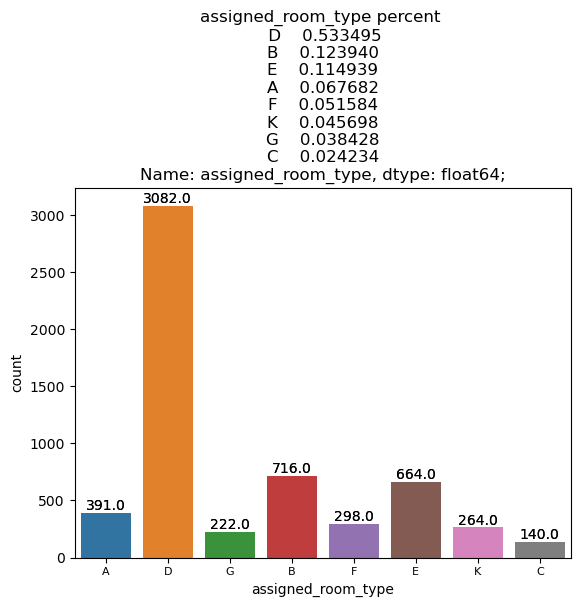

In [249]:
# among those who are not assigned their reserved room AND did not cancel, what room were they assigned to?
# maybe even though they did not get the room they want, they did not cancel bc the room is good?

# most people were assigned room type D although they did not reserve it
# room type D could have a lot of vacancies? or could be a good room type since they did not cancel? 
# if hotel wants to minimise loss due to cancellation, they could consider giving assigning room D if reserved room type is not available (assuming that room type D could be a good room type)

sns.countplot(x = assigned0_cancelled0['assigned_room_type'])
normalise_count = assigned0_cancelled0['assigned_room_type'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title(str('assigned_room_type') + ' percent \n {};'.format(normalise_count))
plt.xticks(fontsize=8)

for p in sns.countplot(x = assigned0_cancelled0['assigned_room_type']).patches:
    sns.countplot(x = assigned0_cancelled0['assigned_room_type']).text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=10, color='black', ha='center', va='bottom')

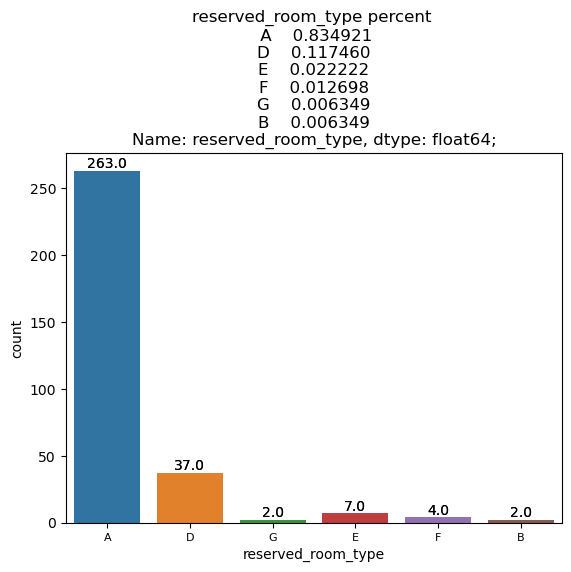

In [250]:
# among those who are not assigned their reserved room (assignment = 0), 5% cancelled
# among those who are not assigned their reserved room AND cancelled, what room did they reserve?
# what room did they want only?

# most people who reserved room type A and did not get assigned to it, decided to cancel their booking

assigned0_cancelled1 = df[(df['assignment']==0) & (df['is_canceled']==1)]

sns.countplot(x = assigned0_cancelled1['reserved_room_type'])
normalise_count = assigned0_cancelled1['reserved_room_type'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title(str('reserved_room_type') + ' percent \n {};'.format(normalise_count))
plt.xticks(fontsize=8)

for p in sns.countplot(x = assigned0_cancelled1['reserved_room_type']).patches:
    sns.countplot(x = assigned0_cancelled1['reserved_room_type']).text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=10, color='black', ha='center', va='bottom')

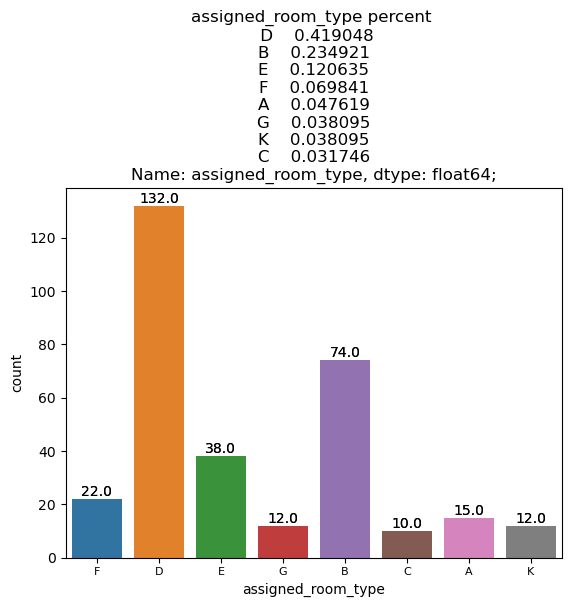

In [251]:
# among those who are not assigned their reserved room AND cancelled, what room were they assigned to?
# maybe they cancelled bc they did not like this particular room type?

# most people were assigned room type D although they did not reserve it 
# but they did not want it?

sns.countplot(x = assigned0_cancelled1['assigned_room_type'])
normalise_count = assigned0_cancelled1['assigned_room_type'].value_counts(normalize = True)

# we are using the output of value_counts() normalised as the chart title
ax = plt.title(str('assigned_room_type') + ' percent \n {};'.format(normalise_count))
plt.xticks(fontsize=8)

for p in sns.countplot(x = assigned0_cancelled1['assigned_room_type']).patches:
    sns.countplot(x = assigned0_cancelled1['assigned_room_type']).text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=10, color='black', ha='center', va='bottom')

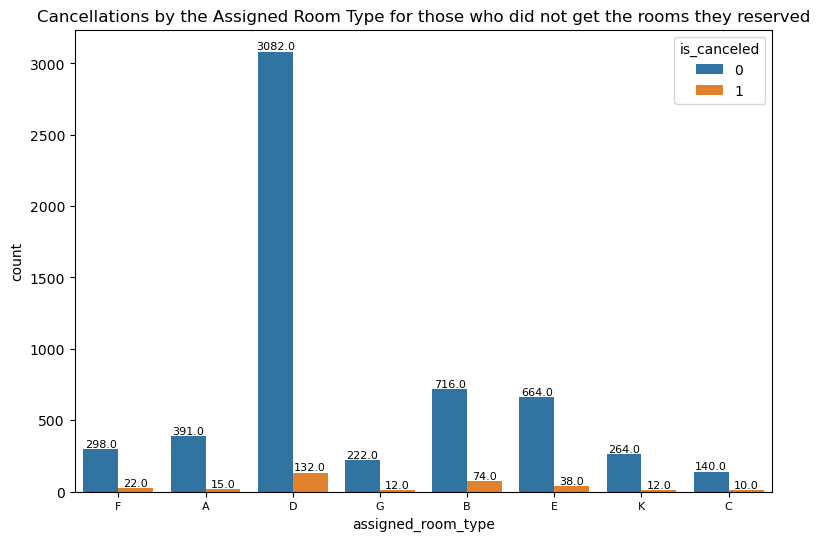

In [252]:
# among those who did not get assigned the room they reserved, how many cancelled due to the assigned room type

plt.figure(figsize=(9,6))
ax = sns.countplot(x= df[df['assignment']==0]['assigned_room_type'], hue=df['is_canceled'])
plt.title('Cancellations by the Assigned Room Type for those who did not get the rooms they reserved')
plt.xticks(fontsize=8)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
            fontsize=8, color='black', ha='center', va='bottom')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'K')])

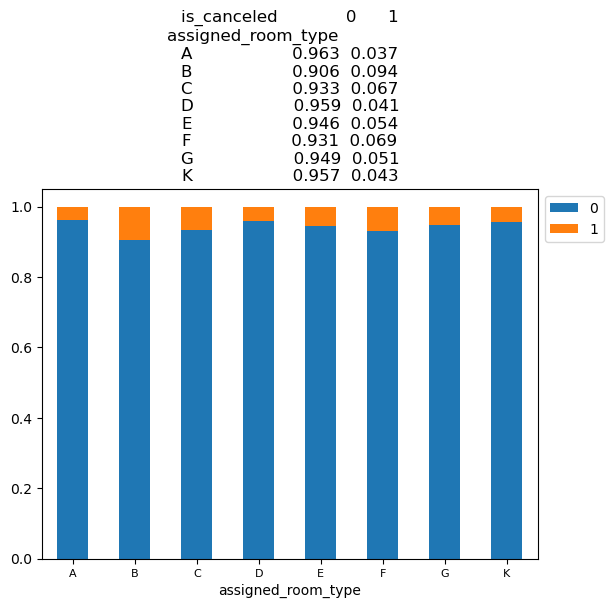

In [253]:
# among those who did not get assigned the room they reserved, how many % cancelled for each assigned room type

df_JobBivariate = df[df['assignment']==0].groupby('assigned_room_type')['is_canceled'].value_counts(normalize = True).unstack()
ax = df_JobBivariate.plot(kind='bar', stacked='True', title = str(df_JobBivariate.round(3)))
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(fontsize=8, rotation=0)

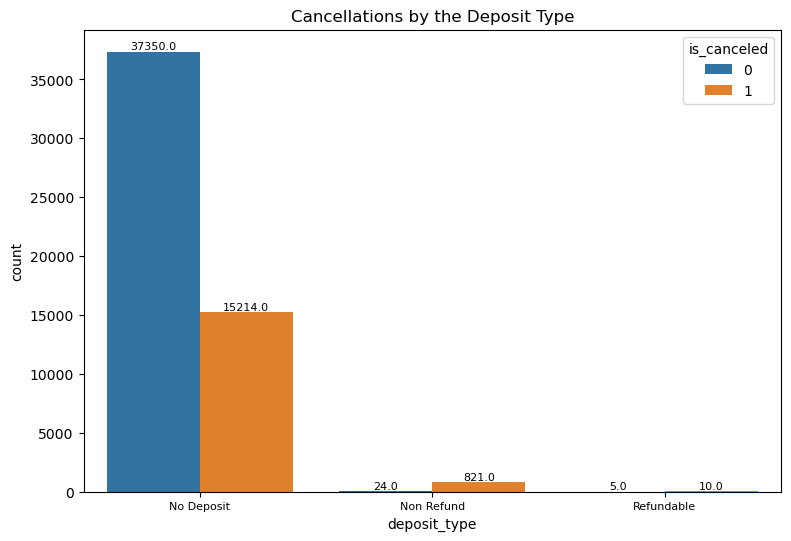

In [254]:
multi_bar("deposit_type", "Deposit Type")

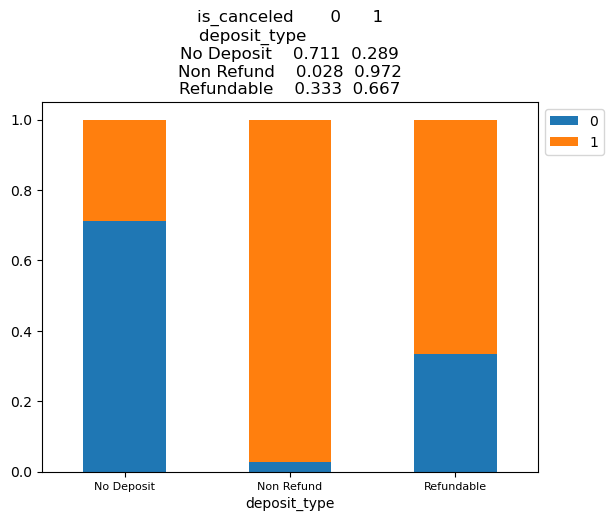

In [255]:
stacked_bar("deposit_type")

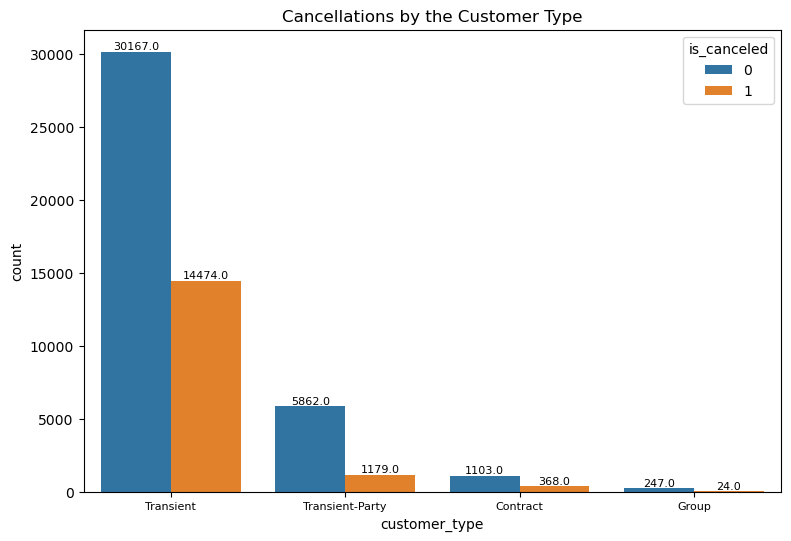

In [256]:
multi_bar("customer_type", "Customer Type")

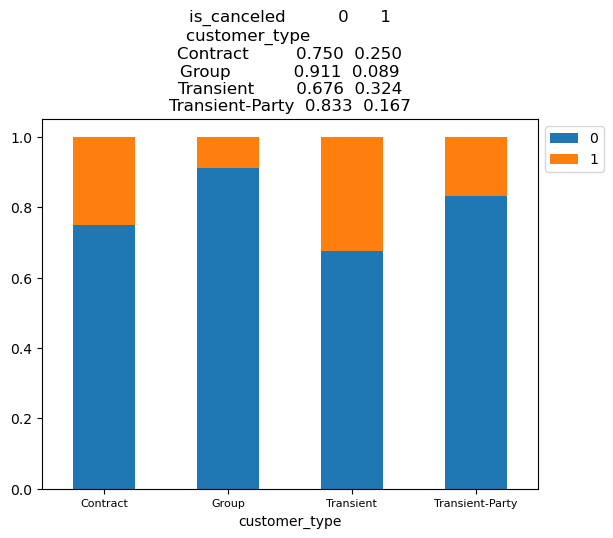

In [257]:
stacked_bar("customer_type")

## Analysis

Through Univariate Analysis:
- lead_time: Generally most people make their bookings more than a month before arriving
- total_stay: Most people stay for 1-5 nights
- total_members: Most bookings consist of 2 people
- meal: Most people booked bed & breakfast meal package
- country: Most bookings of city hotels are in Europe
- market_segment: Highest market segment is via Online Travel Agent
- distribution_channel: Highest distribution is via Travel Agents and Tour Operators
- is_repeated_guest: Most people are not repeated guests
- reserved_room_type: Highest reserved room type is type A
- deposit_type: Most bookings do not need deposits
- agent: Most bookings are through agents
- customer_type: Most customers are Transient 


Through Bivariate Analysis:
1) Meal
- Bookings with no meal packages is the second most booked type yet it has the highest % of cancellations.
- Only 17% of the bookings had no meal package yet the bookings with 35% of it was cancelled
- This makes sense as customers do not have much to lose if cancelled in terms of meal since they did not spend additional money to purchase the meal package.
<br>

2) Continent
- A significant number of bookings from Africa was cancelled although it only makes up a small % of the bookings.
- Almost half (46%) of the bookings from Africa were cancelled (2% of the bookings had Africa as its continent). 
<br>

3) Reserved Room Type
- 70% of the rooms reserved were room type A (most reserved room) but it is the room type that has the 2nd least % of cancellations (28% cancelled)
- We would expect it to have the highest % of cancellations since it is the room type that was most reserved but to the contrary, it is not.
<br>

4) Deposit Type

    a) Non Refundable Deposit Type
    - 97% of the non refundable deposit rooms were cancelled although only 1% of the rooms booked are non refundable deposit. 
    - Non refundable deposit rooms had the highest % of cancellations compared to no deposit rooms and refundable deposit rooms which is surprising since the cancellation would mean that the deposit is forfeited hence we would expect it to have the least % of cancellations. Yet it still has the highest % of cancellations.
<br>

   b) No Deposit Type
    - 98% of the rooms were no deposit rooms (highest % of bookings) but only 29% of the no deposit rooms were cancelled (least % of cancellations). 
    - Since no deposit rooms is the room type that makes up the bulk of the bookings, we should expect it to have the highest % of cancellations. However, no deposit rooms have the least % of cancellations although this room type has the highest % of bookings. 
<br><br>    

5) Assignment
- Among those who were assigned the room they reserved, 33% cancelled
- Most of them reserved room type A
- However, room type F had the highest % of cancellations excluding room types C and P given their few bookings. 
- Room type F is the third most reserved room type hence was not expected to have the highest % of cancellations
- Futher analysis could be conducted as to why many customers who book room type F would cancel their booking.
<br><br>
- Among those who were not assigned the room they reserved, 5% cancelled
- Most of these people reserved room type A. Most of them were assigned room type D
- However, based on the assigned room type, room type B had the highest % of cancellations while room type D had the 2nd least % of cancellations
- We would expect room type D to have the highest % of cancellations since most of them were assigned room type D
- Room type B could have the highest % of cancellations instead as it could be unpopular to the customers and they did not like that they were assigned room type B instead of the room they reserved. The city hotels could look into this and find out how to decrease the number of cancellations for room type B.
